In [22]:
%run '0.0_init_configuration.ipynb'

In [23]:
# Descargar datos históricos de BTC-USD
ticker = 'BTC-USD'
df = yf.Ticker(ticker)
df = df.history(start='2011-01-01', end='2025-01-26')

In [24]:
# Ema movil de 100 periodos
df['EMA_long'] = ta.SMA(df['Close'], timeperiod=200)

# calcular relación precio/EMA
df['Price_EMA'] = df['Close'] / df['EMA_long']

In [25]:
# Transformar valores menores a 1 para que sean negativos
def adjust_scale(value):
    return value - 1 if value < 1 else value - 1

df['Adjust_price'] = df['Price_EMA'].apply(adjust_scale)

In [26]:
# Definir categorías de riesgo
conditions = [
    (df['Price_EMA'] < 0.5),
    (df['Price_EMA'] >= 0.5) & (df['Price_EMA'] < 0.75),
    (df['Price_EMA'] >= 0.75) & (df['Price_EMA'] < 1),
    (df['Price_EMA'] >= 1) & (df['Price_EMA'] < 1.25),
    (df['Price_EMA'] >= 1.25) & (df['Price_EMA'] < 1.5),
    (df['Price_EMA'] >= 1.5) & (df['Price_EMA'] < 1.75),
    (df['Price_EMA'] >= 1.75) & (df['Price_EMA'] < 2),
    (df['Price_EMA'] >= 2)
]

colors = ['blue', 'blue', 'cyan','green', 'yellow', '#ffc107', '#e65100', '#bf360c']


In [27]:
# Crear una columna categórica para riesgo
df['Risk_Level'] = np.select(conditions, range(len(colors)), default=np.nan)

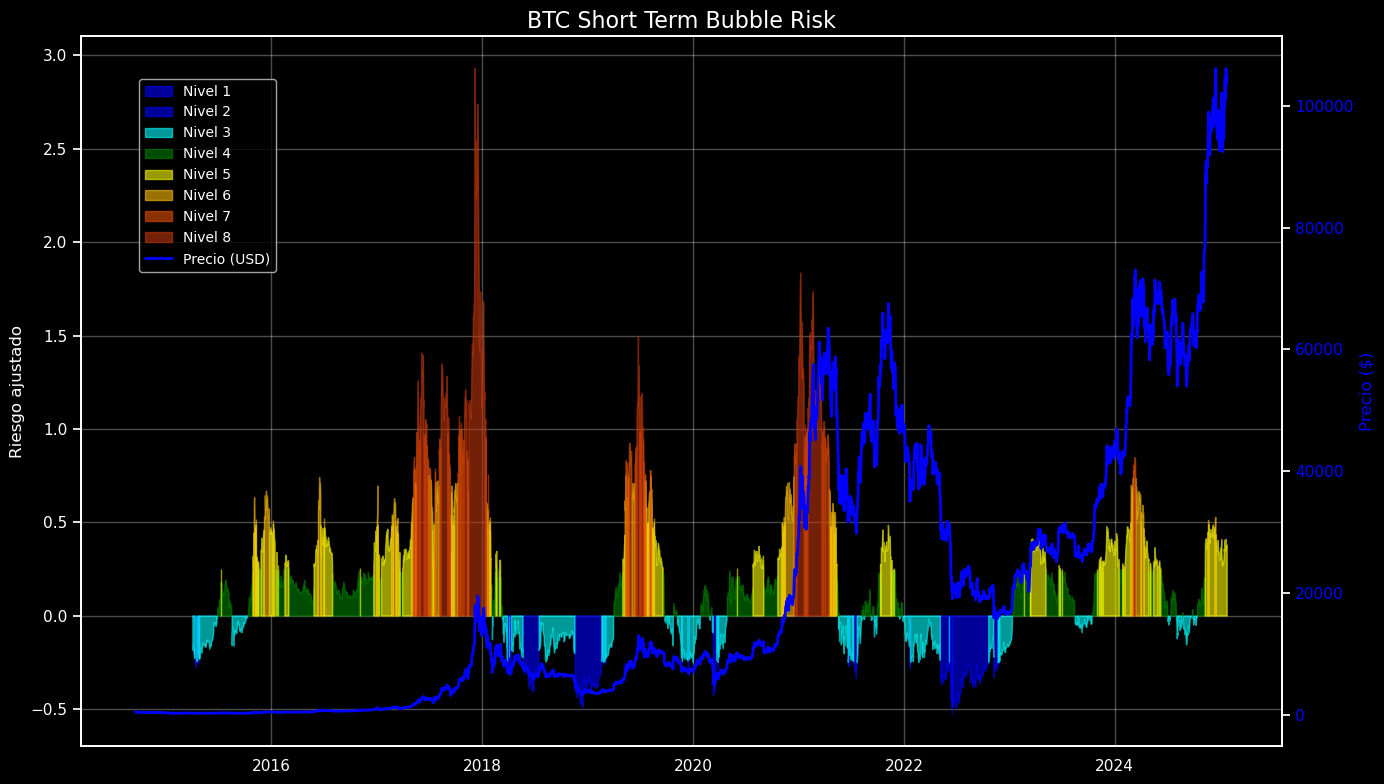

In [28]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico de riesgo como áreas coloreadas (en el eje principal)
for i, color in enumerate(colors):
    mask = df['Risk_Level'] == i
    ax1.fill_between(df.index, 0, df['Adjust_price'].where(mask), 
                     color=color, alpha=0.6, label=f'Nivel {i + 1}')

# Configurar el eje principal (riesgo)
ax1.set_ylabel('Riesgo ajustado', fontsize=12)
ax1.tick_params(axis='y')
ax1.set_title('BTC Short Term Bubble Risk', fontsize=16)
ax1.grid(alpha=0.3)

# Crear un segundo eje `y` para el precio
ax2 = ax1.twinx()
ax2.plot(df.index, df['Close'], label='Precio (USD)', color='blue', linewidth=2, linestyle='-')
ax2.set_ylabel('Precio ($)', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Agregar la leyenda combinada
fig.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0.1, 0.9))

# Ajustar diseño
plt.tight_layout()
plt.show()